## Identificação do Aluno/Dupla:

**Nome/Matrícula:** Renan Vieira Guedes/221031363

**Nome/Matrícula:**


---


## Primeiro Projeto de Tópicos Especiais em Matemática Aplicada (01/2024)

**Contexto do Conjunto de Dados**

Embora muitos estudos tenham sido realizados no passado sobre fatores que afetam a expectativa de vida, considerando variáveis demográficas, composição de renda e taxas de mortalidade, foi descoberto que o efeito da imunização e do índice de desenvolvimento humano não foi levado em consideração. Além disso, algumas das pesquisas anteriores foram feitas considerando a regressão linear múltipla com base em um conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores declarados anteriormente, formulando um modelo de regressão ainda com base na regressão linear múltipla, considerando dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como hepatite B, poliomielite e difteria também serão consideradas. Em poucas palavras, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações deste conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator de previsão que está contribuindo para um menor valor da expectativa de vida. Isso ajudará a sugerir a um país qual área deve receber importância para melhorar eficientemente a expectativa de vida de sua população.

**Conteúdo**

O projeto depende da precisão dos dados. O repositório de dados do Observatório Global da Saúde (GHO) da Organização Mundial da Saúde (OMS) monitora o estado de saúde, bem como muitos outros fatores relacionados para todos os países. Os conjuntos de dados são disponibilizados ao público para fins de análise de dados de saúde. O conjunto de dados relacionado à expectativa de vida, fatores de saúde para 193 países foi coletado do mesmo site do repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde, apenas os fatores críticos foram escolhidos, os quais são mais representativos. Foi observado que nos últimos 15 anos, houve um enorme desenvolvimento no setor da saúde, resultando na melhoria das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação aos últimos 30 anos. Portanto, neste projeto, consideramos dados do ano 2000-2015 para 193 países para análise posterior. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. Na inspeção visual inicial, os dados mostraram alguns valores ausentes. Como os conjuntos de dados eram da OMS, não encontramos erros evidentes. Os dados ausentes foram manipulados no software R usando o comando Missmap. O resultado indicou que a maioria dos dados ausentes era para população, hepatite B e PIB. Os dados ausentes eram de países menos conhecidos, como Vanuatu, Tonga, Togo, Cabo Verde etc. Encontrar todos os dados para esses países foi difícil e, portanto, foi decidido que excluíssemos esses países do conjunto de dados do modelo final. O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2938 linhas, o que significava 20 variáveis de previsão. Todas as variáveis de previsão foram então divididas em várias categorias amplas: Fatores relacionados à imunização, Fatores de mortalidade, Fatores econômicos e Fatores sociais.

**O conjunto de dados visa responder às seguintes perguntas-chave:**

* Os vários fatores de previsão que foram escolhidos inicialmente realmente afetam a expectativa de vida?
* Quais são as variáveis de previsão que realmente afetam a expectativa de vida?
* Um país com um valor de expectativa de vida menor (menor que 65 anos) deve aumentar seus gastos com saúde para melhorar sua expectativa de vida média?
* Como as taxas de mortalidade infantil e adulta afetam a expectativa de vida?
* A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.
* Qual é o impacto da escolaridade na expectativa de vida dos humanos?
* A expectativa de vida tem relação positiva ou negativa com o consumo de álcool?
* Os países densamente povoados tendem a ter menor expectativa de vida?
* Qual é o impacto da cobertura de imunização na expectativa de vida?

*Obs.: este conjunto de dados pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)*

In [75]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [76]:
data = pd.read_csv('life_expectancy_data.csv')
data = data.dropna()

In [77]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [79]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


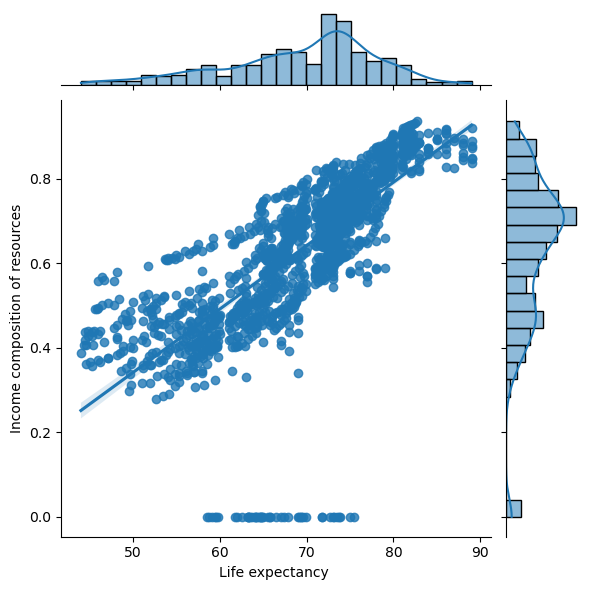

In [80]:
sns.jointplot(x='Life expectancy ', y='Income composition of resources', data=data, kind='reg')

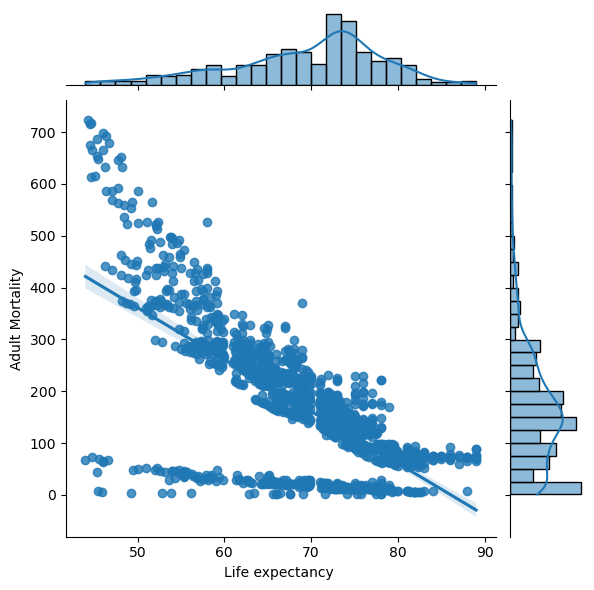

In [81]:
sns.jointplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='reg')

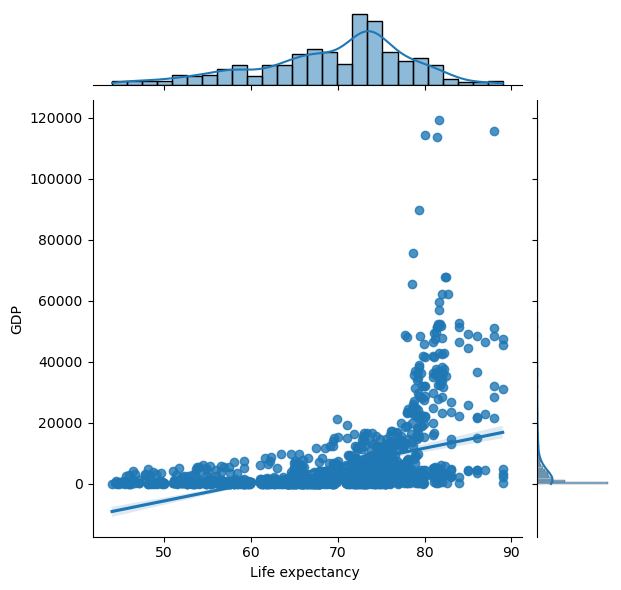

In [82]:
sns.jointplot(x='Life expectancy ', y='GDP', data=data, kind='reg')


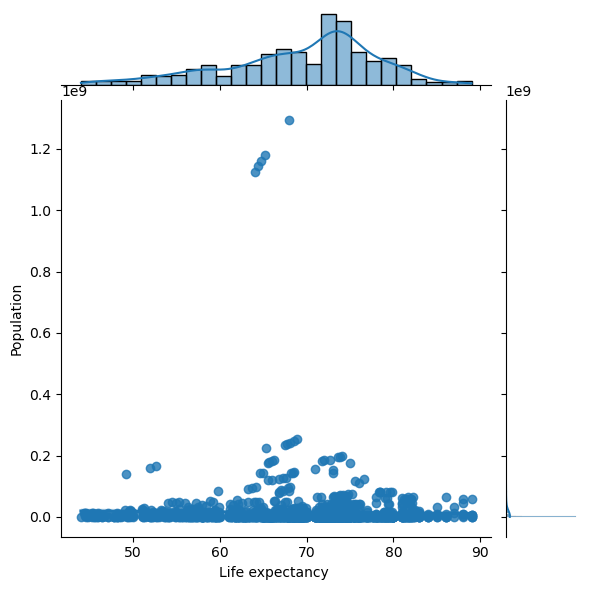

In [83]:
sns.jointplot(x='Life expectancy ', y='Population', data=data, kind='reg')

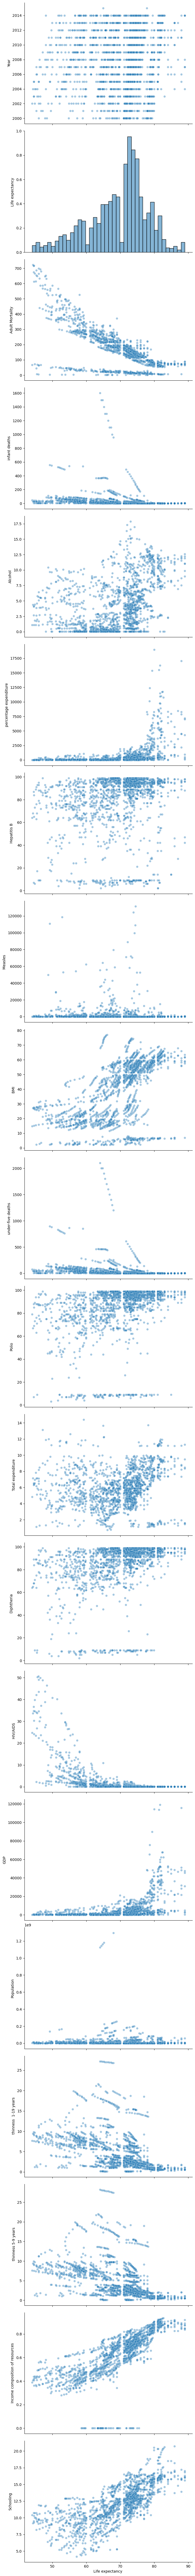

In [95]:
sns.pairplot(data,
             kind='scatter',
             x_vars=['Life expectancy '],
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40},
             height=5, 
             aspect=1.5)

**Variaveis de previsão que realmente afetam a expectatividade de vida**

- Income composition of resources: Composição de renda dos recursos
- Schooling: Escolaridade

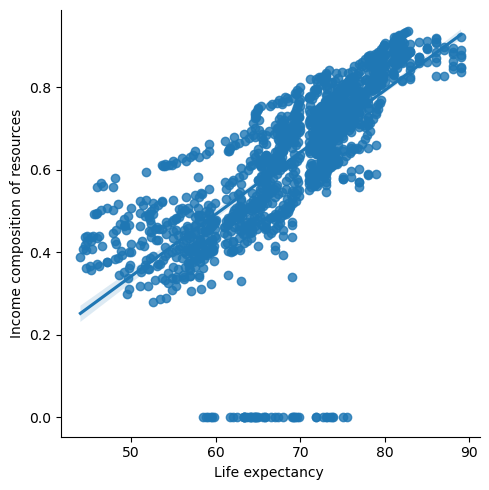

In [85]:
sns.lmplot(x='Life expectancy ', y='Income composition of resources', data=data)

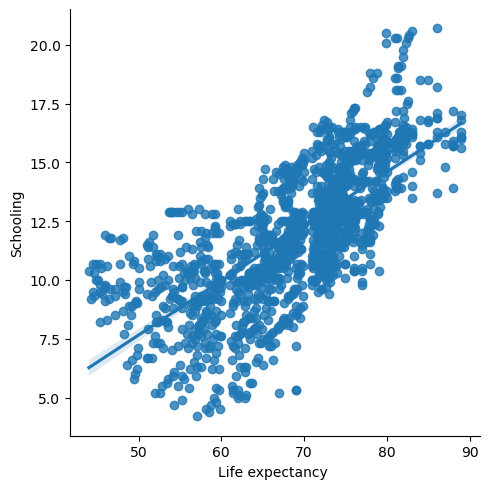

In [86]:
sns.lmplot(x='Life expectancy ', y='Schooling', data=data)

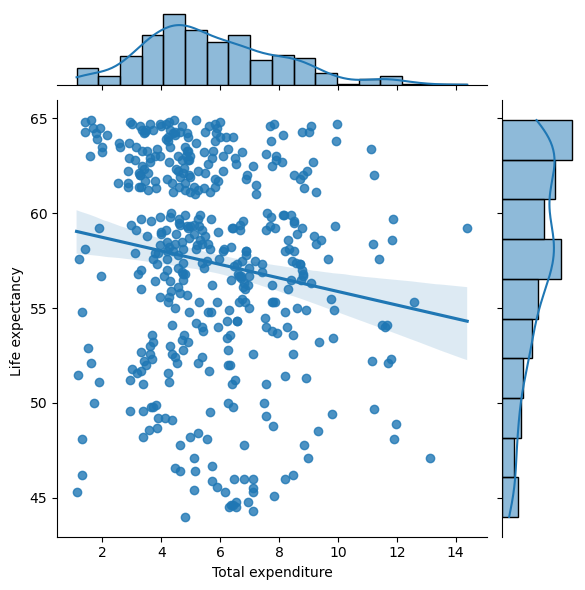

In [96]:
sns.jointplot(x='Total expenditure', y='Life expectancy ', data=data[data['Life expectancy ']<65], kind='reg')

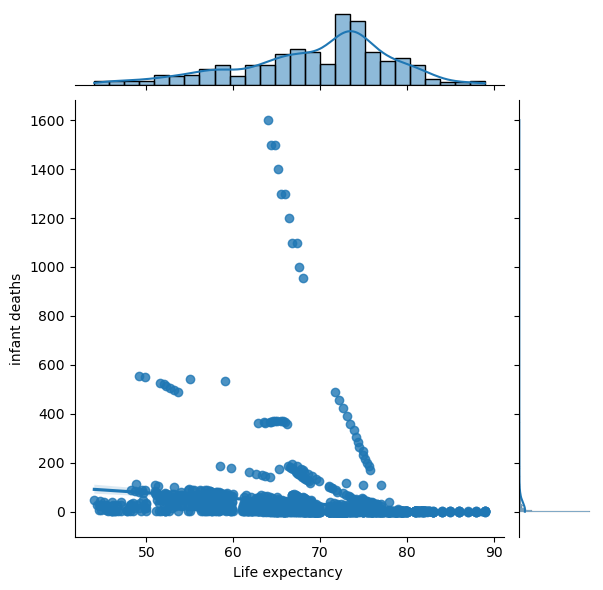

In [88]:
sns.jointplot(x='Life expectancy ', y='infant deaths', data=data, kind='reg')

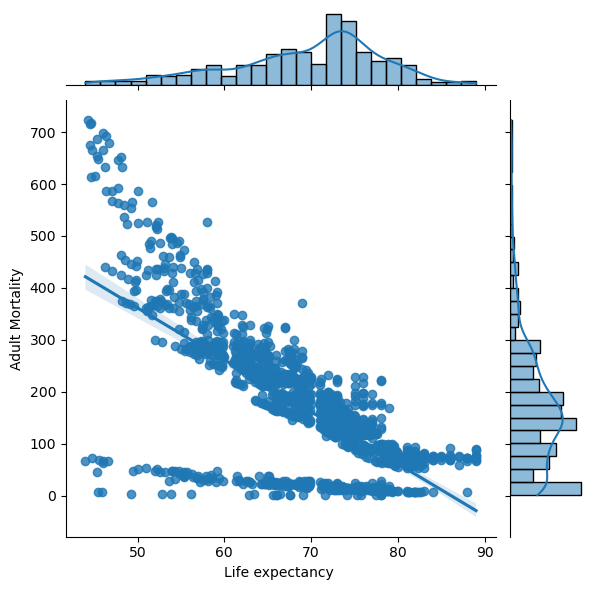

In [89]:
sns.jointplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='reg')

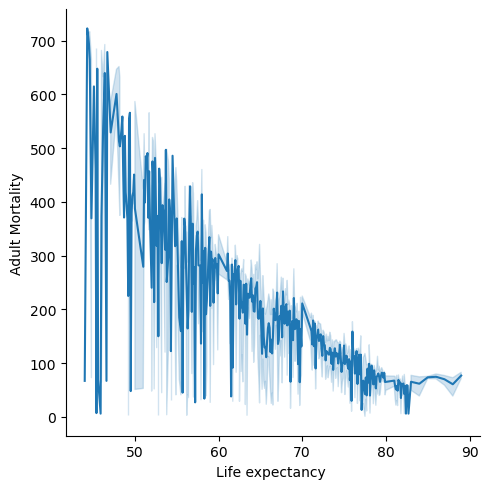

In [90]:
sns.relplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='line')

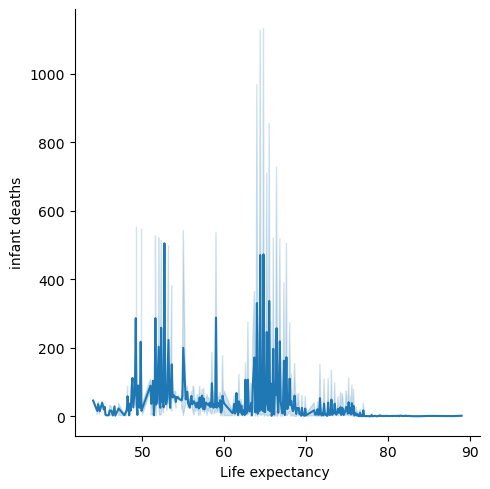

In [91]:
sns.relplot(x='Life expectancy ', y='infant deaths', data=data, kind='line')

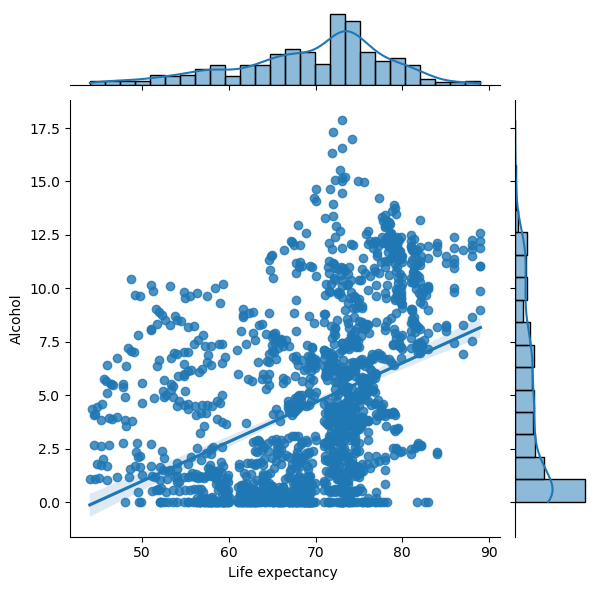

In [92]:
sns.jointplot(x='Life expectancy ', y='Alcohol', data=data, kind='reg')

In [93]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64